In [52]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
df = pd.read_csv("sample.csv")
df.head()

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5


Text(0, 0.5, 'Y')

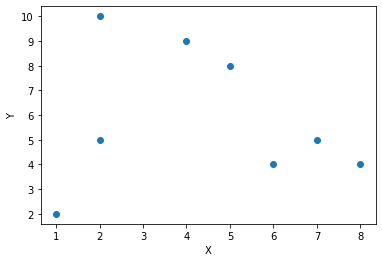

In [54]:
plt.scatter(df.x,df.y)
plt.xlabel('X')
plt.ylabel('Y')

In [55]:
km = KMeans(n_clusters=3)
km.fit(df)
km.labels_

array([1, 0, 2, 1, 2, 2, 0, 1], dtype=int32)

In [56]:
km.predict([[0, 0], [12, 3]])

/home/amarnath/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2], dtype=int32)

In [57]:
km.cluster_centers_

array([[1.5       , 3.5       ],
       [3.66666667, 9.        ],
       [7.        , 4.33333333]])

In [58]:
y_predicted = km.predict(df)
df['cluster']=y_predicted


In [59]:
df['cluster']

0    1
1    0
2    2
3    1
4    2
5    2
6    0
7    1
Name: cluster, dtype: int32

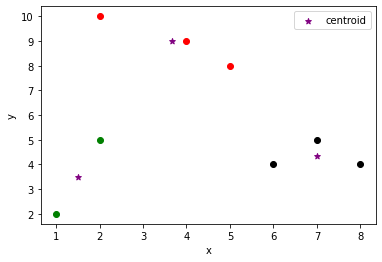

In [60]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.x,df1['y'],color='green')
plt.scatter(df2.x,df2['y'],color='red')
plt.scatter(df3.x,df3['y'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [20]:
sse = []
k_rng = range(1,9)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['x','y']])
    sse.append(km.inertia_)

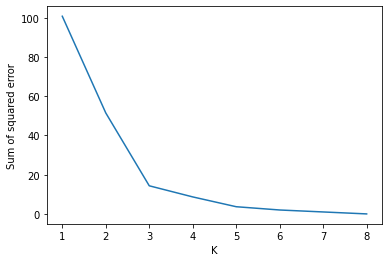

In [21]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [63]:
KMean= KMeans(n_clusters=2)
KMean.fit(df)
label=KMean.predict(df)

In [64]:
print(f'Silhouette Score(n=2): {silhouette_score(df, label)}')


Silhouette Score(n=2): 0.394059319950921


In [65]:
KMean= KMeans(n_clusters=3)
KMean.fit(df)
label=KMean.predict(df)

In [66]:
print(f'Silhouette Score(n=3): {silhouette_score(df, label)}')


Silhouette Score(n=3): 0.5835007107652712


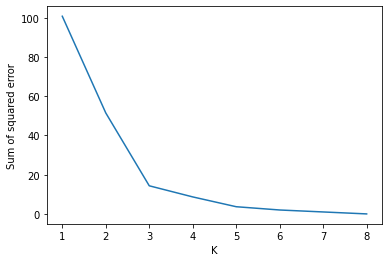

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [92]:
ss = []
for k in range(2,8):
    KMean= KMeans(n_clusters=k)
    KMean.fit(df)
    label=KMean.predict(df)
    ss.append(silhouette_score(df, label))
    print(f'Silhouette Score(k={k}): {silhouette_score(df, label)}')


Silhouette Score(k=2): 0.37581217281213636
Silhouette Score(k=3): 0.5835007107652712
Silhouette Score(k=4): 0.4793107016798831
Silhouette Score(k=5): 0.37350180443587994
Silhouette Score(k=6): 0.15852567706292603
Silhouette Score(k=7): 0.03661165235168155


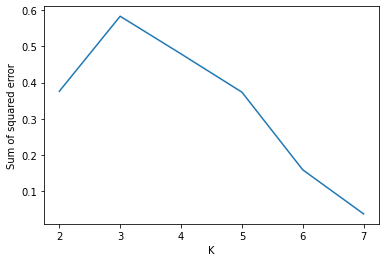

In [93]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2,8),ss)